In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
import random

xa[:3] = [10.484565538541808, 10.428421673471657, 10.229786118839147]


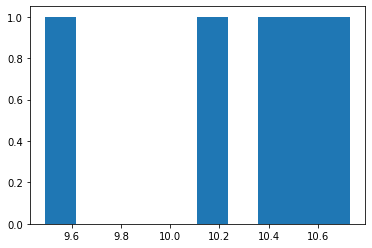

xb[:3] = [11.645174608836575, 11.17775876215779, 10.655967545516154]


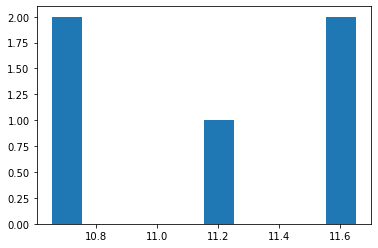

x = array([11.64517461, 10.22978612, 11.65395513, 10.72887211, 10.65596755,
       10.48456554, 11.17775876, 10.68579836, 10.42842167,  9.49265085])
y = array([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.])


In [2]:
def gen_data(n: int = 1000, shuffle: bool = True, plot: bool = False, debug: bool = False) -> Tuple[List[float], List[float]]:
    """Generate n xa, xb numbers from Gaussian distributions
    n xa numbers generated from Gaus(10, 1)
    n xb numbers generated from Gaus(11, 1))"""
    xa = [np.random.normal(10, 1) for i in range(n)]
    ya = np.zeros_like(xa)
    if debug:
        print(f'{xa[:3] = }')
    if plot:
        c, _, _ = plt.hist(xa)
        plt.show()

    xb = [np.random.normal(11, 1) for i in range(n)]
    yb = np.ones_like(xb)
    if debug:
        print(f'{xb[:3] = }')
    if plot:
        c, _, _ = plt.hist(xb)
        plt.show()
        
    x = np.concatenate([xa,xb]) # targets
    y = np.concatenate([ya,yb]) # labels
    
    # Shuffle coherently
    if shuffle:
        seed = random.randrange(10000)
        random.seed(seed)
        random.shuffle(x)
        random.seed(seed)
        random.shuffle(y)
    
    if debug:
        print(f'{x = }')
        print(f'{y = }')
    return x, y

# Testing
_, _ = gen_data(5, True, True, True)

In [3]:
# Make model

import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 1),
    nn.Sigmoid()
)

# Print model
print(model)

loss = nn.BCELoss()

from torch.optim import Adam

opt = Adam(model.parameters(), lr = 1e-4) # lr: learning rate

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
  (5): Sigmoid()
)


In [4]:
# Generate and prepare data

def get_batch_data(batch_size: int = 2048, debug: bool = False) -> Tuple[np.ndarray, np.ndarray]:
    x, y = gen_data(batch_size)
    len_x = len(x)
    x = np.array(x).reshape(len_x, 1)
    y = np.array(y).reshape(len_x, 1)
    if debug:
        print(f'{x = }')
        print(f'{y = }')
    return x, y # targets, labels

# Testing
_, _ = get_batch_data(5, True)

x = array([[ 9.98243449],
       [12.2623676 ],
       [ 9.20631053],
       [10.08687579],
       [10.89280867],
       [10.91621562],
       [ 8.76195485],
       [ 8.95619033],
       [12.33378654],
       [ 9.88633927]])
y = array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]])


In [5]:
# Train model

n_epochs = 5000
for i in range(n_epochs): # loop over epochs
    # get data
    X, y = get_batch_data()
    
    p = model(torch.Tensor(X).float())
    lossval = loss(p, torch.Tensor(y).float())
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Compute gradient of the loss with respect to all the learnable parameters of the model.
    lossval.backward()
    
    opt.step()
    if i % 100 == 0:
        print(lossval)

tensor(0.7223, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6879, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6821, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6749, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6674, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6555, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6427, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6327, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6190, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6047, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5970, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5909, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5909, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5787, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5806, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5719, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5840, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5811, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5709, grad_fn=<BinaryCrossEntropyBack

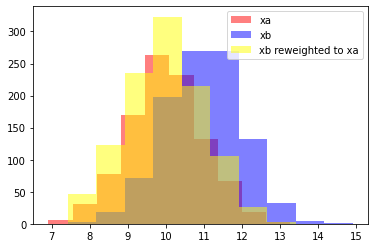

In [6]:
def evaluate():
    x, y = gen_data(1000)
    len_x = len(x)
    x = np.array(x).reshape(len_x, 1)
    y = np.array(y).reshape(len_x, 1)
    xa = x[y==0]
    xb = x[y==1]
    c0, _, _ = plt.hist(xa, alpha = 0.5, label = 'xa', color = 'red')
    c1, _, _ = plt.hist(xb, alpha = 0.5, label = 'xb', color = 'blue')
    with torch.no_grad():
        p = model(torch.Tensor(x))[:,0]
    p = np.array(p)
    y = y.reshape(1, len(y))[0]
    _pp = p[y==1]
    c2, _, _ = plt.hist(xb, alpha = 0.5, weights = (1-_pp)/_pp, label = 'xb reweighted to xa', color = 'yellow') 
    plt.legend()
    plt.show()

evaluate()